In [1]:
from pydpp.dpp import DPP
import numpy as np
import scipy as sp
from sklearn.datasets import make_biclusters
from matplotlib import pyplot as plt
np.random.seed(1729)
%matplotlib inline

In [2]:
X= make_biclusters(shape=(100,2), n_clusters=2, noise=19, random_state=42)
y= X[1]
y=np.array(y, np.int32)[0]
X= X[0]

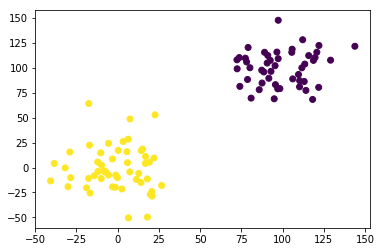

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
dpp = DPP(X)

In [5]:
dpp.compute_kernel(kernel_type='cos-sim')

In [6]:
dpp.A

array([[ 1.        ,  0.9992887 ,  0.98838258, ...,  0.3531972 ,
         0.99995257, -0.98924281],
       [ 0.9992887 ,  1.        ,  0.99341104, ...,  0.31766585,
         0.99887404, -0.99405558],
       [ 0.98838258,  0.99341104,  1.        , ...,  0.20690319,
         0.98685547, -0.99998336],
       ...,
       [ 0.3531972 ,  0.31766585,  0.20690319, ...,  1.        ,
         0.36229198, -0.21254309],
       [ 0.99995257,  0.99887404,  0.98685547, ...,  0.36229198,
         1.        , -0.98777121],
       [-0.98924281, -0.99405558, -0.99998336, ..., -0.21254309,
        -0.98777121,  1.        ]])

In [7]:
idx = dpp.sample_k(8)

[74 60 45 26  7  4  1  0]


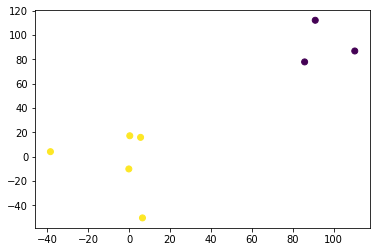

In [8]:
pts = X[idx]
plt.scatter(pts[:, 0], pts[:, 1], c=y[idx])

In [9]:
Z = np.random.random((100,2))

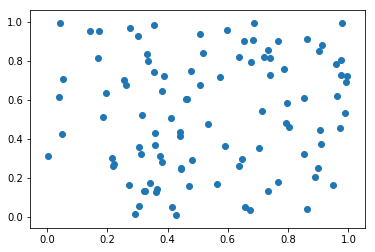

In [10]:
plt.scatter(Z[:, 0], Z[:, 1])

In [11]:
dpp = DPP(Z)
dpp.compute_kernel(kernel_type='cos-sim')

In [12]:
idx = dpp.sample_k(12)

[72 69 68 64 62 60 58 52 18 13  1  0]


In [13]:
nids = list(set(range(len(Z))).difference(set(idx)))
pts = Z[idx]
nps = Z[nids]
len(pts ), len(nps)

(12, 88)

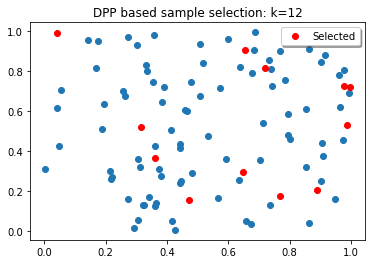

In [14]:
fig, ax = plt.subplots()
ax.plot(nps[:,0], nps[:,1], 'o', label='')
ax.plot(pts[:,0], pts[:,1], 'ro', label='Selected')
ax.set_title('DPP based sample selection: k=12')

legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')

legend.get_frame()#.set_facecolor('#cce6ff')